Моделирование Винеровского процесса. С помощью нормальнораспределенных приращений.

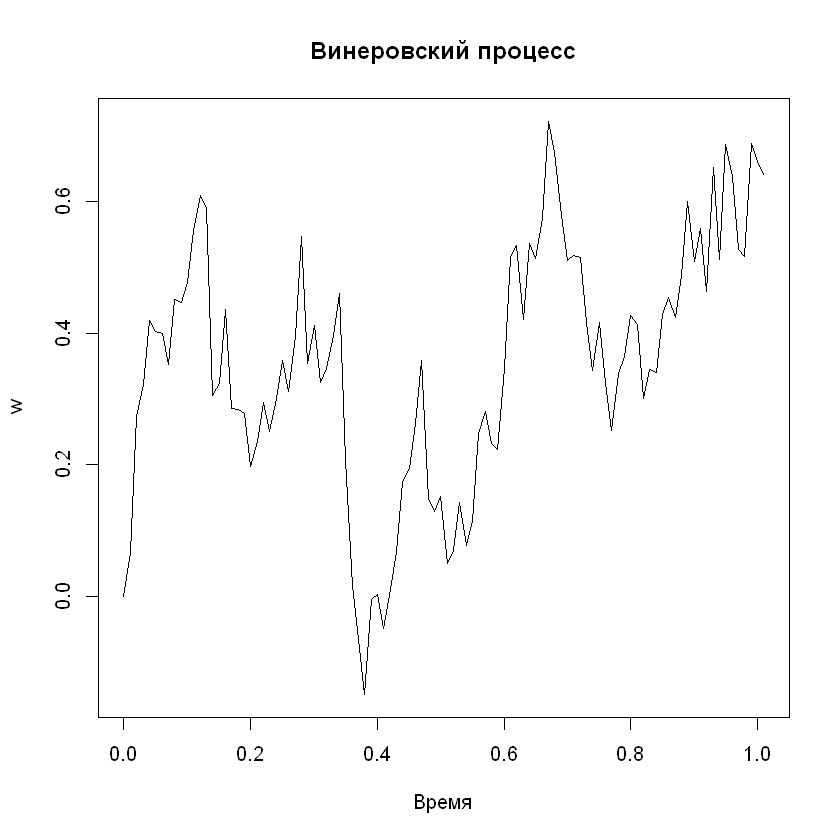

In [3]:
M <- 101 #число точек
w <- rep(0, M)
Time <- 1
h <- Time/(M-1)
j <- 1 #нумерация с 1, w(0) = 0 - первый элемент массива

while (j <= M){
  j <- j + 1
  alpha <- runif(2)
  w[j] <- w[j-1] + sqrt(-2*log(alpha[1]))*cos(2*pi*alpha[2])*sqrt(h)
}
plot((0:M)*h, w, type = "l", main = "Винеровский процесс", xlab = "Время")

Моделирование Винеровского процесса. Моделируем точку посередине.

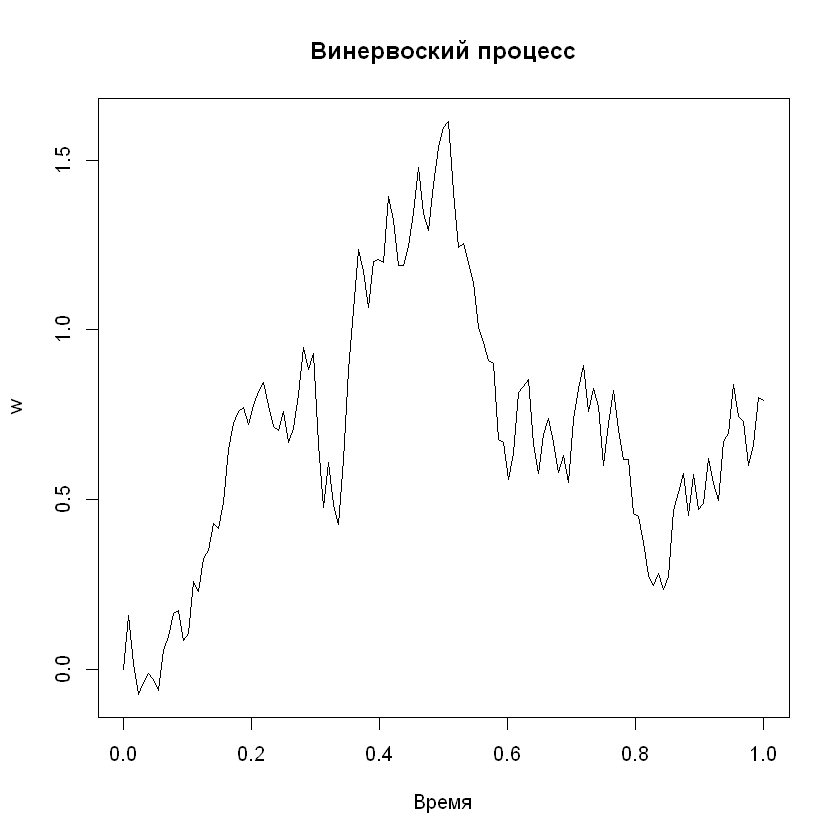

In [4]:
Time <- 1
n <- 7
h <- Time/2^n
M <- 2^n+1 #число точек
w <- rep(0, M)
j <- 1 #нумерация с 1, w(0) - первый элемент массива

w[M] <- rnorm(1, sd = sqrt(Time))
for (i in 1:n){
  d <- (M-1)/(2^i)
  point <- seq(1, M, d)
  p.calculate <- point[seq(2, length(point)-1, 2)]
  p.known <- point[-seq(2, length(point)-1, 2)]
  w[p.calculate] <- ( w[p.known[1:(length(p.known)-1)]] + w[p.known[2:length(p.known)]]
                      + sqrt(Time/2^(i-1)) * rnorm(length(p.calculate)) ) /2
}
plot((0:(M-1))*h, w, type = "l", main = "Винервоский процесс", xlab = "Время")

Моделируем Пуассоновский процесс с помощью приращений.

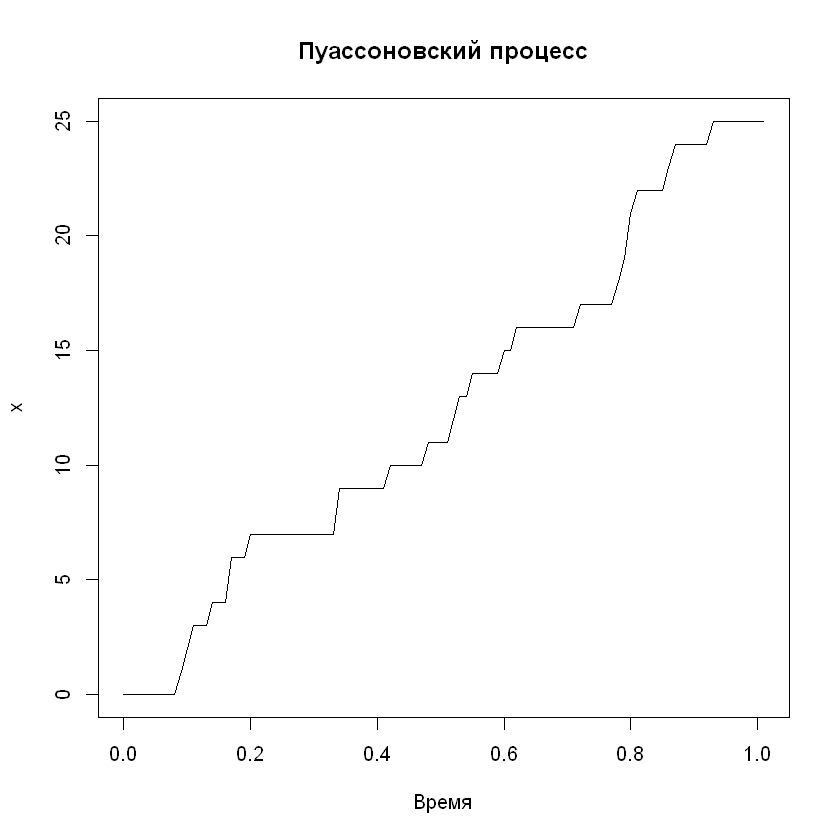

In [3]:
M <- 101
x <- rep(0, M)
Time <- 1
h <- Time/(M-1)
j <- 1
a <- 1/5 #параметр распределения

while (j <= M){
  j <- j + 1
  x[j] <- x[j-1] + rpois(1, a)
}
plot((0:M)*h, x, type = "l", main = "Пуассоновский процесс", xlab = "Время")

Моделируем Пуассоновский процесс. Опрделяем в какой момент происходит приращение на 1.

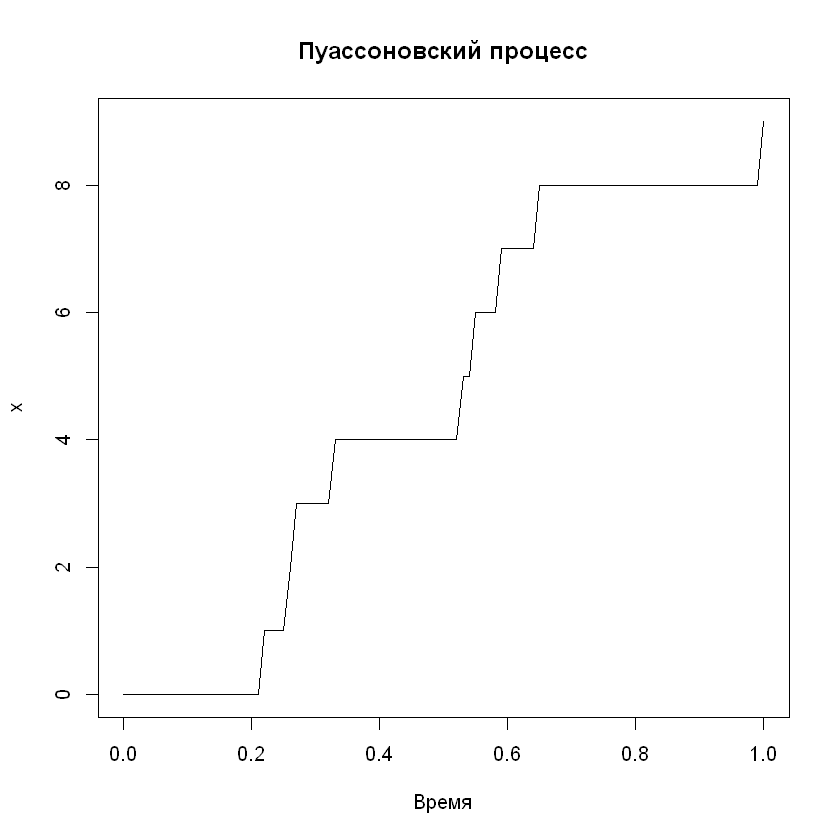

In [4]:
M <- 101
x <- rep(0, M)
Time <- 1
h <- Time/(M-1)
j <- 1
a <- 5

while (j*h <= Time){
  j <- j + 1
  alpha <- runif(1)
  if (alpha < a*h){
    x[j] <- x[j-1] + 1
  }
  else{
    x[j] <- x[j-1]
  }
}
plot((0:(M-1))*h, x, type = "l", main = "Пуассоновский процесс", xlab = "Время")

Моделирование процесса Пуассона. Размер ступеньки.

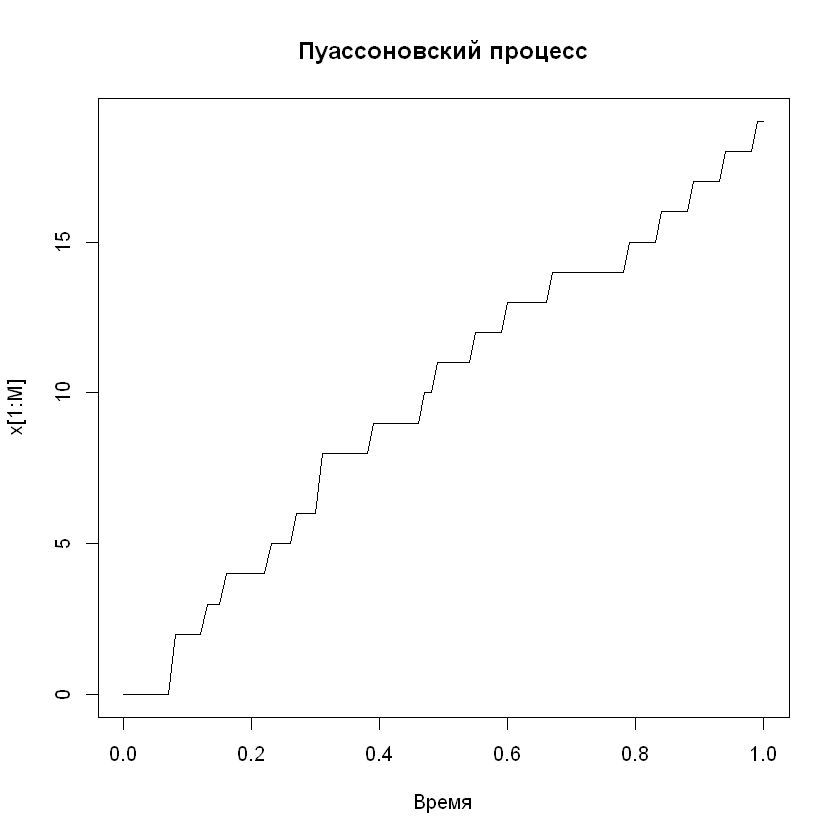

In [5]:
M <- 101
x <- rep(0, M)
Time <- 1
h <- Time/(M-1)
j <- 1
a <- 5

while (j*h <= Time){
  k <- 0
  d <- 0
  while (d < 1){
    d <- d + rexp(1, a)
    k <- k + 1
  }
  if (d > 1){ k <- k - 1}
  x[k+j] <- x[j] + 1
  x[j:(j + k-1)] <- x[j]
  j <- j + k
}
plot((0:(M-1))*h, x[1:M], type = "l", main = "Пуассоновский процесс", xlab = "Время")